## Major League

NFL, MLB, NBA and Soccer scores
1. Set up a data science project structure in a new git repository in your GitHub account
2. Pick one of the game data sets depending your sports preference https://github.com/fivethirtyeight/nfl-elo-game https://github.com/fivethirtyeight/data/tree/master/mlb-elo https://github.com/fivethirtyeight/data/tree/master/nba-carmelo https://github.com/fivethirtyeight/data/tree/master/soccer-spi
3. Load the data set into panda data frames
4. Formulate one or two ideas on how feature engineering would help the data set to
establish additional value using exploratory data analysis
5. Build one or more regression models to determine the scores for each team using the other columns as features
6. Document your process and results
7. Commit your notebook, source code, visualizations and other supporting files to the git repository in GitHub

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from joblib import dump, load

In [2]:
soccerMatchDf = pd.read_csv('../data/spi_matches.csv')
soccerMatchDf.head(10)

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,32.4,67.7,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,53.7,22.9,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05
5,2016-08-13,2411,Barclays Premier League,Middlesbrough,Stoke City,56.32,60.35,0.4380,0.2692,0.2927,...,33.9,32.5,1.0,1.0,1.40,0.55,1.13,1.06,1.05,1.05
6,2016-08-13,2411,Barclays Premier League,Burnley,Swansea City,58.98,59.74,0.4482,0.2663,0.2854,...,36.5,29.1,0.0,1.0,1.24,1.84,1.71,1.56,0.00,1.05
7,2016-08-13,2411,Barclays Premier League,Southampton,Watford,69.49,59.33,0.5759,0.1874,0.2367,...,34.1,30.7,1.0,1.0,1.05,0.22,1.52,0.41,1.05,1.05
8,2016-08-13,1843,French Ligue 1,Bordeaux,St Etienne,62.01,64.92,0.4232,0.2764,0.3004,...,37.9,44.2,3.0,2.0,1.03,1.84,1.10,2.26,3.12,2.10
9,2016-08-13,2411,Barclays Premier League,Manchester City,Sunderland,86.42,53.64,0.8152,0.0525,0.1323,...,73.0,27.0,2.0,1.0,2.14,1.25,1.81,0.92,2.10,1.05


In [3]:
globalRankDf = pd.read_csv('../data/spi_global_rankings.csv')
globalRankDf.head(5)

,rank,prev_rank,name,league,off,def,spi
0,1,1.0,Manchester City,Barclays Premier League,3.32,0.21,95.55
1,2,2.0,Bayern Munich,German Bundesliga,3.21,0.39,92.90
2,3,3.0,Liverpool,Barclays Premier League,2.89,0.26,92.88
3,4,4.0,Paris Saint-Germain,French Ligue 1,2.78,0.41,89.80
4,5,5.0,Barcelona,Spanish Primera Division,2.82,0.44,89.53


In [4]:
globalIntlRankDf = pd.read_csv('../data/spi_global_rankings_intl.csv')
globalIntlRankDf.head(5)

,rank,name,confed,off,def,spi
0,1,Spain,UEFA,3.38,0.58,90.79
1,2,Brazil,CONMEBOL,2.91,0.37,90.65
2,3,Germany,UEFA,3.11,0.59,88.78
3,4,Belgium,UEFA,2.95,0.56,87.97
4,5,Argentina,CONMEBOL,2.57,0.42,86.98


**We are not going to use spi_global_rankings.csv and spi_global_rankings_intl.csv this time since these dataset are the latest rankings. Also, we are concerned about the time of football match, the updated spi have nothing to do with the spi_matches.csv. The spi ranking at the time of football match is already included in this file.** 

In [5]:
soccerMatchDf.columns

Index(['date', 'league_id', 'league', 'team1', 'team2', 'spi1', 'spi2',
       'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2',
       'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1',
       'nsxg2', 'adj_score1', 'adj_score2'],
      dtype='object')

In [6]:
soccerMatchDf.loc[:, soccerMatchDf.isna().any()].tail(10)

,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
32249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Many columns have NaN values instead of valid data. So we will clean those datafields for simplicity.**

In [7]:
cleanSoccerMatchDf = soccerMatchDf.dropna()
cleanSoccerMatchDf.tail(10)
print(cleanSoccerMatchDf.shape)

(12474, 22)


In [8]:
cleanSoccerMatchDf['league'].unique()

array(['French Ligue 1', 'Barclays Premier League',
       'Spanish Primera Division', 'Italy Serie A', 'German Bundesliga',
       'Major League Soccer', 'Brasileiro Série A',
       'Mexican Primera Division Torneo Apertura',
       'Argentina Primera Division', 'UEFA Champions League',
       'UEFA Europa League', 'English League Championship',
       'Portuguese Liga', 'Mexican Primera Division Torneo Clausura',
       'German 2. Bundesliga', 'Chinese Super League', 'Italy Serie B',
       'Australian A-League'], dtype=object)

In [9]:
oneHotLeagues = pd.get_dummies(cleanSoccerMatchDf['league'])
oneHotLeagues.head(5)

,Argentina Primera Division,Australian A-League,Barclays Premier League,Brasileiro Série A,Chinese Super League,English League Championship,French Ligue 1,German 2. Bundesliga,German Bundesliga,Italy Serie A,Italy Serie B,Major League Soccer,Mexican Primera Division Torneo Apertura,Mexican Primera Division Torneo Clausura,Portuguese Liga,Spanish Primera Division,UEFA Champions League,UEFA Europa League
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**The leagues might have some correlation with the scores. So, we applied one hot encoding to the leagues and use these as features.**

In [10]:
scoreCnt1 = cleanSoccerMatchDf['score1'].value_counts()
scoreCnt2 = cleanSoccerMatchDf['score2'].value_counts()


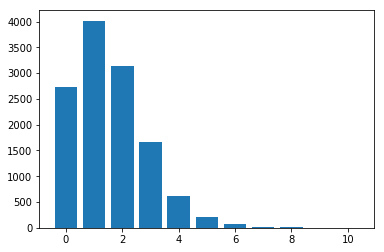

In [11]:
plt.bar(scoreCnt1.index,scoreCnt1.values)
plt.show()

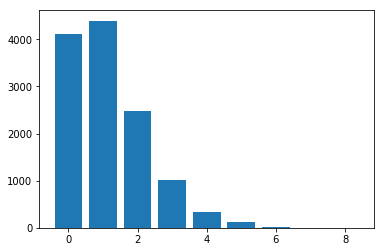

In [12]:
plt.bar(scoreCnt2.index, scoreCnt2.values)
plt.show()

**According to the documentation of the dataset, xg(shot based expected goal), nsxg(nonshot based expected goal) and adj_score(adjuested score) are obtained after the match. So, these columns will not be used as features to predict the scores.**

**We want to predict score of both teams. So at a time, we will take required features and predict score of required teams.**

In [13]:
features = ['spi1', 'spi2','prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2', 'importance1', 'importance2']
featuresDf1 = cleanSoccerMatchDf[features]
featuresDf1.head()

,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2
0,51.16,85.68,0.0463,0.8380,0.1157,0.91,2.36,32.4,67.7
1,68.85,56.48,0.5714,0.1669,0.2617,1.82,0.86,53.7,22.9
2,53.57,66.81,0.3459,0.3621,0.2921,1.16,1.24,38.1,22.2
3,55.19,58.66,0.4214,0.2939,0.2847,1.35,1.14,43.6,34.6
4,68.02,73.25,0.3910,0.3401,0.2689,1.47,1.38,31.9,48.0


In [14]:
featuresDf = featuresDf1.join(oneHotLeagues)
featuresDf.head(10)

,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,Argentina Primera Division,...,German Bundesliga,Italy Serie A,Italy Serie B,Major League Soccer,Mexican Primera Division Torneo Apertura,Mexican Primera Division Torneo Clausura,Portuguese Liga,Spanish Primera Division,UEFA Champions League,UEFA Europa League
0,51.16,85.68,0.0463,0.8380,0.1157,0.91,2.36,32.4,67.7,0,...,0,0,0,0,0,0,0,0,0,0
1,68.85,56.48,0.5714,0.1669,0.2617,1.82,0.86,53.7,22.9,0,...,0,0,0,0,0,0,0,0,0,0
2,53.57,66.81,0.3459,0.3621,0.2921,1.16,1.24,38.1,22.2,0,...,0,0,0,0,0,0,0,0,0,0
3,55.19,58.66,0.4214,0.2939,0.2847,1.35,1.14,43.6,34.6,0,...,0,0,0,0,0,0,0,0,0,0
4,68.02,73.25,0.3910,0.3401,0.2689,1.47,1.38,31.9,48.0,0,...,0,0,0,0,0,0,0,0,0,0
5,56.32,60.35,0.4380,0.2692,0.2927,1.30,1.01,33.9,32.5,0,...,0,0,0,0,0,0,0,0,0,0
6,58.98,59.74,0.4482,0.2663,0.2854,1.37,1.05,36.5,29.1,0,...,0,0,0,0,0,0,0,0,0,0
7,69.49,59.33,0.5759,0.1874,0.2367,1.91,1.05,34.1,30.7,0,...,0,0,0,0,0,0,0,0,0,0
8,62.01,64.92,0.4232,0.2764,0.3004,1.39,1.14,37.9,44.2,0,...,0,0,0,0,0,0,0,0,0,0
9,86.42,53.64,0.8152,0.0525,0.1323,2.69,0.48,73.0,27.0,0,...,0,0,0,0,0,0,0,0,0,0


**Now, we will scale data of features between 0 and 1 so that the effect of higher values will be neutralized.**

In [15]:
scaler = MinMaxScaler()
scaledFeatures = scaler.fit_transform(featuresDf)
scaledFeatures

array([[0.44131398, 0.86439217, 0.01647655, ..., 0.        , 0.        ,
        0.        ],
       [0.65895669, 0.50474196, 0.57108154, ..., 0.        , 0.        ,
        0.        ],
       [0.47096457, 0.63197438, 0.33291086, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.25516732, 0.32454736, 0.3560414 , ..., 0.        , 0.        ,
        0.        ],
       [0.7230561 , 0.60376894, 0.55122518, ..., 1.        , 0.        ,
        0.        ],
       [0.39074803, 0.43823131, 0.41930714, ..., 0.        , 0.        ,
        0.        ]])

In [16]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(scaledFeatures, cleanSoccerMatchDf.score1, test_size=0.1, random_state=6)
X_tr1, X_val1, y_tr1, y_val1 = train_test_split(X_train1, y_train1, test_size=0.1, random_state=6)

In [17]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(scaledFeatures, cleanSoccerMatchDf.score2, test_size=0.1, random_state=6)
X_tr2, X_val2, y_tr2, y_val2 = train_test_split(X_train2, y_train2, test_size=0.1, random_state=6)

**At first, we will see how well some basic regression models(linear regression, decision tree regressor) will fit the data.**

In [18]:
model = LinearRegression()
model.fit(X_tr1,y_tr1)
dump(model, '../models/linearRegression.joblib')

['../models/linearRegression.joblib']

In [19]:
loadedModel = load('../models/linearRegression.joblib')
trPredict = loadedModel.predict(X_tr1)
score = r2_score(y_tr1, trPredict)

In [20]:
print(score)

0.13381274295669165


In [21]:
valPrediction = loadedModel.predict(X_val1)
valScore = r2_score(y_val1, valPrediction)
print(valScore)

testPrediction = loadedModel.predict(X_test1)
testScore = r2_score(y_test1, testPrediction)
print(testScore)

0.11155611316785163
0.1459314445439467


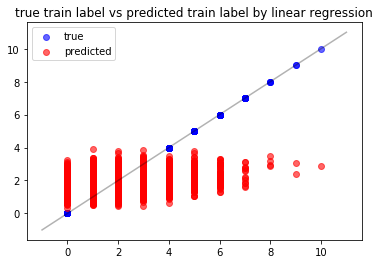

In [22]:
true_handle = plt.scatter(y_tr1, y_tr1 , alpha=0.6, color='blue', label='true')
fit = np.poly1d(np.polyfit(y_tr1,y_tr1,1))
lims = np.linspace(min(y_tr1) - 1, max(y_tr1) + 1)
plt.plot(lims, fit(lims), alpha=0.3, color='black')

pred_handle = plt.scatter(y_tr1, trPredict, alpha=0.6, color='red', label='predicted')

#Legend and show
plt.legend(handles=[true_handle,pred_handle], loc='upper left')
plt.title("true train label vs predicted train label by linear regression")
plt.show()


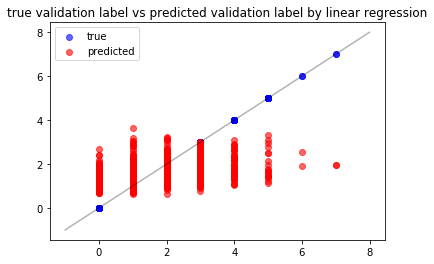

In [23]:
true_handle = plt.scatter(y_val1, y_val1 , alpha=0.6, color='blue', label='true')
fit = np.poly1d(np.polyfit(y_val1,y_val1,1))
lims = np.linspace(min(y_val1) - 1, max(y_val1) + 1)
plt.plot(lims, fit(lims), alpha=0.3, color='black')

pred_handle = plt.scatter(y_val1, valPrediction, alpha=0.6, color='red', label='predicted')

#Legend and show
plt.legend(handles=[true_handle,pred_handle], loc='upper left')
plt.title("true validation label vs predicted validation label by linear regression")
plt.show()

In [24]:
maxScore = -1
bestModel = None
bestDepth = None
for depth in range(1,15):
    dtRegModel = DecisionTreeRegressor(random_state=6, max_depth=depth)
    dtRegModel.fit(X_tr1,y_tr1)
    
    dtPredict = dtRegModel.predict(X_val1)
    score = r2_score(y_val1, dtPredict)
    if(score>maxScore):
        bestModel = dtRegModel
        bestDepth = depth
        maxScore = score
print(maxScore)
print(bestModel)
print(bestDepth)
dump(bestModel, '../models/dtRegressor.joblib')

0.10294103706785829
DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=6, splitter='best')
3


['../models/dtRegressor.joblib']

In [25]:
loadedModel = load('../models/dtRegressor.joblib')
dtTrainPredict = loadedModel.predict(X_tr1)
score = r2_score(y_tr1, dtTrainPredict)
print(score)

0.1328465948177997


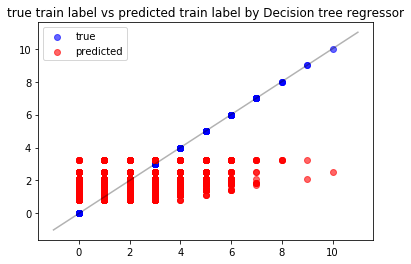

In [26]:
true_handle = plt.scatter(y_tr1, y_tr1 , alpha=0.6, color='blue', label='true')
fit = np.poly1d(np.polyfit(y_tr1,y_tr1,1))
lims = np.linspace(min(y_tr1) - 1, max(y_tr1) + 1)
plt.plot(lims, fit(lims), alpha=0.3, color='black')

pred_handle = plt.scatter(y_tr1, dtTrainPredict, alpha=0.6, color='red', label='predicted')

#Legend and show
plt.legend(handles=[true_handle,pred_handle], loc='upper left')
plt.title("true train label vs predicted train label by Decision tree regressor")
plt.show()

In [27]:
dtValPredict = loadedModel.predict(X_val1)
score = r2_score(y_val1, dtValPredict)
print(score)
dtTestPredict = loadedModel.predict(X_test1)
scoreTest = r2_score(y_test1, dtTestPredict)
print(scoreTest)

0.10294103706785829
0.13490721099582514


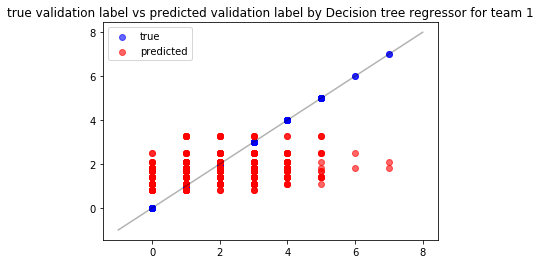

In [28]:
true_handle = plt.scatter(y_val1, y_val1 , alpha=0.6, color='blue', label='true')
fit = np.poly1d(np.polyfit(y_val1,y_val1,1))
lims = np.linspace(min(y_val1) - 1, max(y_val1) + 1)
plt.plot(lims, fit(lims), alpha=0.3, color='black')

pred_handle = plt.scatter(y_val1, dtValPredict, alpha=0.6, color='red', label='predicted')

#Legend and show
plt.legend(handles=[true_handle,pred_handle], loc='upper left')
plt.title("true validation label vs predicted validation label by Decision tree regressor for team 1")
plt.show()

**Linear regression model has trouble fitting the training data while decision tree regressor has capability to perfeclty fit training data by if the depth is set to high value. However, when the depth is high, the performance on the validation set degrades (overfitting issue).**

**When we chose the best depth, the performance is similar to that of linear regression. However, plot shows that decision tree has compact predicted value whereas the plot of linear regression shows the scattered predicted data.**

**We will use random forest regression to mitigate the overfitting problem of random forest and also might increase the performance.**

**We will use Grid Search Cross Validation to tune hyperparameters.**

In [29]:
params = {
    'max_depth':np.arange(3,15),
    'max_features':[0.7, 0.8, 0.9, 1.0],
    'n_estimators':[10, 15, 20]
}

rfRegressor = RandomForestRegressor(random_state=6)
gridSearch = GridSearchCV(rfRegressor, params,verbose=1)
gridSearch.fit(X_train1, y_train1)
print(gridSearch.best_estimator_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=1)]: Done 432 out of 432 | elapsed:  4.1min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=0.9, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=6, verbose=0, warm_start=False)


In [30]:
bestRegressor1 = gridSearch.best_estimator_
dump(bestRegressor1, '../models/rfRegressor1.joblib')

loadedModelTeam1 = load('../models/rfRegressor1.joblib')
rfTrainPredict = loadedModelTeam1.predict(X_train1)
score = r2_score(y_train1, rfTrainPredict)
print(score)
  

0.13543760673780025


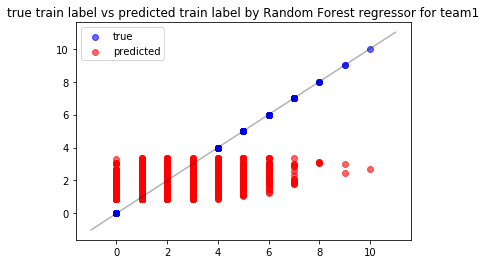

In [31]:
true_handle = plt.scatter(y_train1, y_train1 , alpha=0.6, color='blue', label='true')
fit = np.poly1d(np.polyfit(y_train1,y_train1,1))
lims = np.linspace(min(y_train1) - 1, max(y_train1) + 1)
plt.plot(lims, fit(lims), alpha=0.3, color='black')

pred_handle = plt.scatter(y_train1, rfTrainPredict, alpha=0.6, color='red', label='predicted')

#Legend and show
plt.legend(handles=[true_handle,pred_handle], loc='upper left')
plt.title("true train label vs predicted train label by Random Forest regressor for team1")
plt.show()

In [32]:
rfTestPredict = loadedModelTeam1.predict(X_test1)
score = r2_score(y_test1, rfTestPredict)
print(score)
  

0.13883421844366073


In [33]:
gridSearch2 = GridSearchCV(rfRegressor, params,verbose=1)
gridSearch2.fit(X_train2, y_train2)
print(gridSearch2.best_estimator_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=1)]: Done 432 out of 432 | elapsed:  3.8min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=0.8, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
           oob_score=False, random_state=6, verbose=0, warm_start=False)


In [34]:
bestRegressor2 = gridSearch2.best_estimator_
dump(bestRegressor2, '../models/rfRegressor2.joblib')

loadedModelTeam2 = load('../models/rfRegressor2.joblib')
rfTrainPredict2 = loadedModelTeam2.predict(X_train2)
score = r2_score(y_train2, rfTrainPredict2)
print(score)

0.10359064848477484


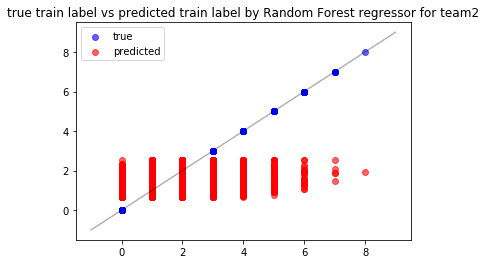

In [35]:
true_handle = plt.scatter(y_train2, y_train2 , alpha=0.6, color='blue', label='true')
fit = np.poly1d(np.polyfit(y_train2,y_train2,1))
lims = np.linspace(min(y_train2) - 1, max(y_train2) + 1)
plt.plot(lims, fit(lims), alpha=0.3, color='black')

pred_handle = plt.scatter(y_train2, rfTrainPredict2, alpha=0.6, color='red', label='predicted')

#Legend and show
plt.legend(handles=[true_handle,pred_handle], loc='upper left')
plt.title("true train label vs predicted train label by Random Forest regressor for team2")
plt.show()

In [36]:
rfTestPredict2 = loadedModelTeam2.predict(X_test2)
score = r2_score(y_test2, rfTestPredict2)
print(score)

0.10356180649748292


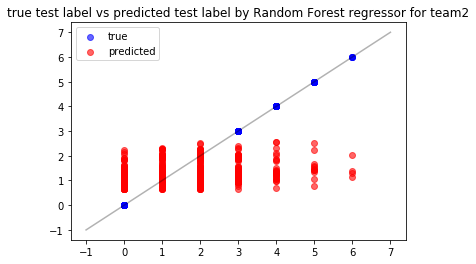

In [37]:
true_handle = plt.scatter(y_test2, y_test2 , alpha=0.6, color='blue', label='true')
fit = np.poly1d(np.polyfit(y_test2,y_test2,1))
lims = np.linspace(min(y_test2) - 1, max(y_test2) + 1)
plt.plot(lims, fit(lims), alpha=0.3, color='black')

pred_handle = plt.scatter(y_test2, rfTestPredict2, alpha=0.6, color='red', label='predicted')

#Legend and show
plt.legend(handles=[true_handle,pred_handle], loc='upper left')
plt.title("true test label vs predicted test label by Random Forest regressor for team2")
plt.show()

In [38]:
sortedIndTeam1 = np.argsort(-1*loadedModelTeam1.feature_importances_)
print(-np.sort(-1*loadedModelTeam1.feature_importances_))
featuresDf.columns.values[sortedIndTeam1]

[0.5222607  0.34990199 0.06812683 0.03411562 0.01602238 0.003569
 0.00271316 0.00224396 0.00104634 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


array(['proj_score1', 'prob1', 'probtie', 'prob2', 'spi1', 'proj_score2',
       'spi2', 'importance1', 'importance2', 'Spanish Primera Division',
       'Portuguese Liga', 'Mexican Primera Division Torneo Clausura',
       'Mexican Primera Division Torneo Apertura', 'Major League Soccer',
       'Italy Serie B', 'Italy Serie A', 'German Bundesliga',
       'Chinese Super League', 'French Ligue 1',
       'English League Championship', 'UEFA Champions League',
       'Brasileiro Série A', 'Barclays Premier League',
       'Australian A-League', 'Argentina Primera Division',
       'German 2. Bundesliga', 'UEFA Europa League'], dtype=object)

In [39]:
sortedIndTeam2 = np.argsort(-1*loadedModelTeam2.feature_importances_)
print(-np.sort(-1*loadedModelTeam2.feature_importances_))
featuresDf.columns.values[sortedIndTeam2]

[0.66402641 0.17374908 0.08813745 0.04976484 0.01257555 0.00439182
 0.00285261 0.00224643 0.00156091 0.00069491 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


array(['proj_score2', 'prob2', 'prob1', 'probtie', 'spi2', 'importance1',
       'spi1', 'proj_score1', 'importance2', 'German 2. Bundesliga',
       'Spanish Primera Division', 'Portuguese Liga',
       'Mexican Primera Division Torneo Clausura',
       'Mexican Primera Division Torneo Apertura', 'Major League Soccer',
       'Italy Serie B', 'Italy Serie A', 'Chinese Super League',
       'French Ligue 1', 'English League Championship',
       'UEFA Champions League', 'Brasileiro Série A',
       'Barclays Premier League', 'Australian A-League',
       'Argentina Primera Division', 'German Bundesliga',
       'UEFA Europa League'], dtype=object)

**It can be seen that for team 1, proj_score1 has high weight in comparison to other features. Similarly, for team 2, proj_score2 has high weight. It can be concluded that projected score has high correlation with actual score but still, the actual score is difficult to generalize using the provided features by these regression models.**